# Esercizio 1

**La legge dei grandi numeri**

In [4]:
# Scriviamo una funzione che simula il lancio di una moneta N volte e restituisce la frequenza di volte che è uscita testa
import random

def lancio_moneta(N):
    """
    Parametri:
        N (int): numero di lanci
    
    Output:
        frequenza (float): frequenza in percentuale
    """ 
    results = [random.randint(0,1) for x in range(N)]
    head_number = results.count(1)

    return (head_number / N) * 100

N = int(input("Inserire numero di lanci: "))
print("Provvedo alla simulazione...")
print(f"Frequenza relativa: {round(lancio_moneta(N),2)}%")

Provvedo alla simulazione...
Frequenza relativa: 57.14%


In [46]:
# Calcoliamo la frequenza con la grandezza del campione che varia 100 volte da 10 a 20000
# Creiamo una lista di 100 elementi con il numero di lanci
simulation_throw_1 = [random.randint(10,1000) for x in range(100)]
simulation_throw_2 = [random.randint(10,5000) for x in range(100)]
simulation_throw_3 = [random.randint(10,10000) for x in range(100)]
simulation_throw_4 = [random.randint(10,20000) for x in range(100)]

frequency_1 = [lancio_moneta(x) for x in simulation_throw_1]
frequency_2 = [lancio_moneta(x) for x in simulation_throw_2]
frequency_3 = [lancio_moneta(x) for x in simulation_throw_3]
frequency_4 = [lancio_moneta(x) for x in simulation_throw_4]

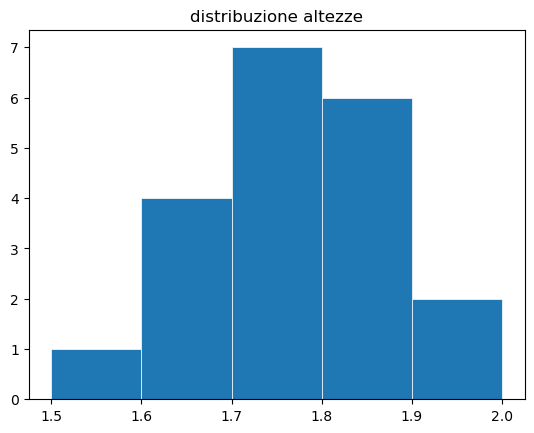

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import seaborn as sns

plt.hist([1.55,1.60,1.62,1.62,1.64,1.70,1.71,1.72,1.73,1.75,1.75,1.77,1.80,1.83,1.84,1.84, 1.86, 1.87, 1.90, 1.95], range=[1.50,2.0], bins=5,  linewidth=0.5, edgecolor="white");
plt.title('distribuzione altezze')
plt.show()
